<a href="https://colab.research.google.com/github/v1git12/Capstone-Project-4-Zomato-Restraurant-Clustering-And-Sentiment-Analysis/blob/main/Zomato_Restaurant_Clustering_%26_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Zomato Restaurant Clustering & Sentiment Analysis



##### **Project Type**    - Unsupervised Machine Learning
##### **Contribution**    - Team
##### **Team Member 1 -** Vinayak Marathe
##### **Team Member 2 -** Riya Patel


# **Project Summary -**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

The Zomato Restaurant Clustering and Sentiment Analysis Project is a machine learning project that involves clustering restaurants based on their features and performing sentiment analysis on customer reviews. The project uses unsupervised learning techniques to group similar restaurants and identifies patterns and similarities among them. Additionally, sentiment analysis is performed on the reviews of each restaurant to classify them as positive, negative, or neutral. The insights gained from this project can be useful for restaurant owners to understand customer preferences and improve their services accordingly.


# **GitHub Link -**


1.   Vinayak Marathe: https://github.com/v1git12
2.   Riya Patel: https://github.com/riyapatelrp

# **Problem Statement**


**The restaurant industry is highly competitive and dynamic, with new restaurants constantly entering the market. Restaurant owners face the challenge of understanding customer preferences and meeting their expectations to stay relevant in the market. In this context, there is a need for a data-driven approach that can help restaurant owners gain insights into customer preferences and improve their services accordingly. The Zomato Restaurant Clustering and Sentiment Analysis Project aims to address this problem by leveraging machine learning techniques to cluster restaurants based on their features and perform sentiment analysis on customer reviews to identify areas of improvement.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_extraction.text import TfidfVectorizer

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from nltk.stem import PorterStemmer


import warnings
warnings.filterwarnings('ignore')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Dataset Loading

In [ ]:
# Load Dataset
# Reading Zomato Restaurant names and Metadata.csv file
url = 'https://drive.google.com/file/d/1m4lylf_iAyxlsIW1uTGrMSuhHYwuntJl/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
restaurant_df = pd.read_csv(url)

In [ ]:
# Reading Zomato Restaurant reviews.csv file
url2 = 'https://drive.google.com/file/d/1JG_8OGZ6tS-0SOstH_x3n9sN0ZI1AFNC/view?usp=sharing'
url2 = 'https://drive.google.com/uc?id=' + url2.split('/')[-2]
reviews_df = pd.read_csv(url2)

### Dataset First View

In [ ]:
# Dataset First Look 
restaurant_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavours-gachibowli,800,"Food Hygiene Rated Restaurants in Hyderabad, Corporate Favorites, Great Buffets, Top-Rated, Gold Curated, Live Sports Screenings","Chinese, Continental, Kebab, European, South Indian, North Indian","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gachibowli,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gachibowli,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-hotel-restaurant-gachibowli,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Beverages",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon-brew-company-gachibowli,"1,200","Best Bars & Pubs, Food Hygiene Rated Restaurants in Hyderabad, Top-Rated, Gold Curated, Hyderabad's Hottest","Asian, Continental, North Indian, Chinese, Mediterranean","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12noon to 12midnight (Fri-Sat)"


In [ ]:
reviews_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . had Saturday lunch , which was cost effective .\nGood place for a sate brunch. One can also chill with friends and or parents.\nWaiter Soumen Das was really courteous and helpful.",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. Service is very prompt. Food is good. Over all a good experience. Soumen Das - kudos to the service,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx for the service by Pradeep and Subroto. My personal recommendation is Penne Alfredo Pasta:) ....... Also the music in the background is amazing.,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,"Soumen das and Arun was a great guy. Only because of their behavior and sincerety, And good food off course, I would like to visit this place again.",5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and basket mutton biryani. All are good. Thanks to Pradeep. He served well. We enjoyed here. Ambience is also very good.,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
restaurant_df.shape

(105, 6)

In [ ]:
reviews_df.shape

(10000, 7)

### Dataset Information

In [ ]:
# Dataset Info
restaurant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [ ]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(restaurant_df[restaurant_df.duplicated()])

0

In [ ]:
len(reviews_df[reviews_df.duplicated()])

36

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
restaurant_df.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [ ]:
reviews_df.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

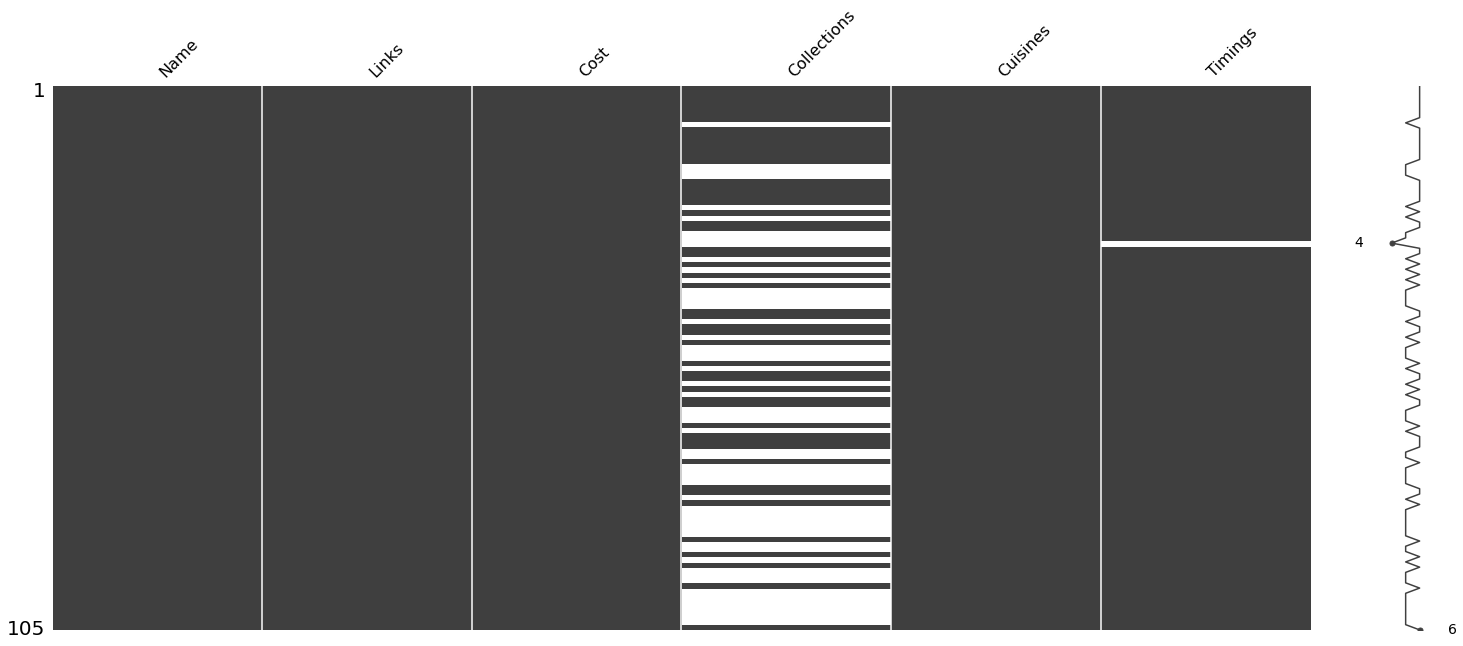

In [ ]:
# Visualizing the missing values
import missingno as msno
# visualize the null values in the DataFrame 1
msno.matrix(restaurant_df)
plt.show()

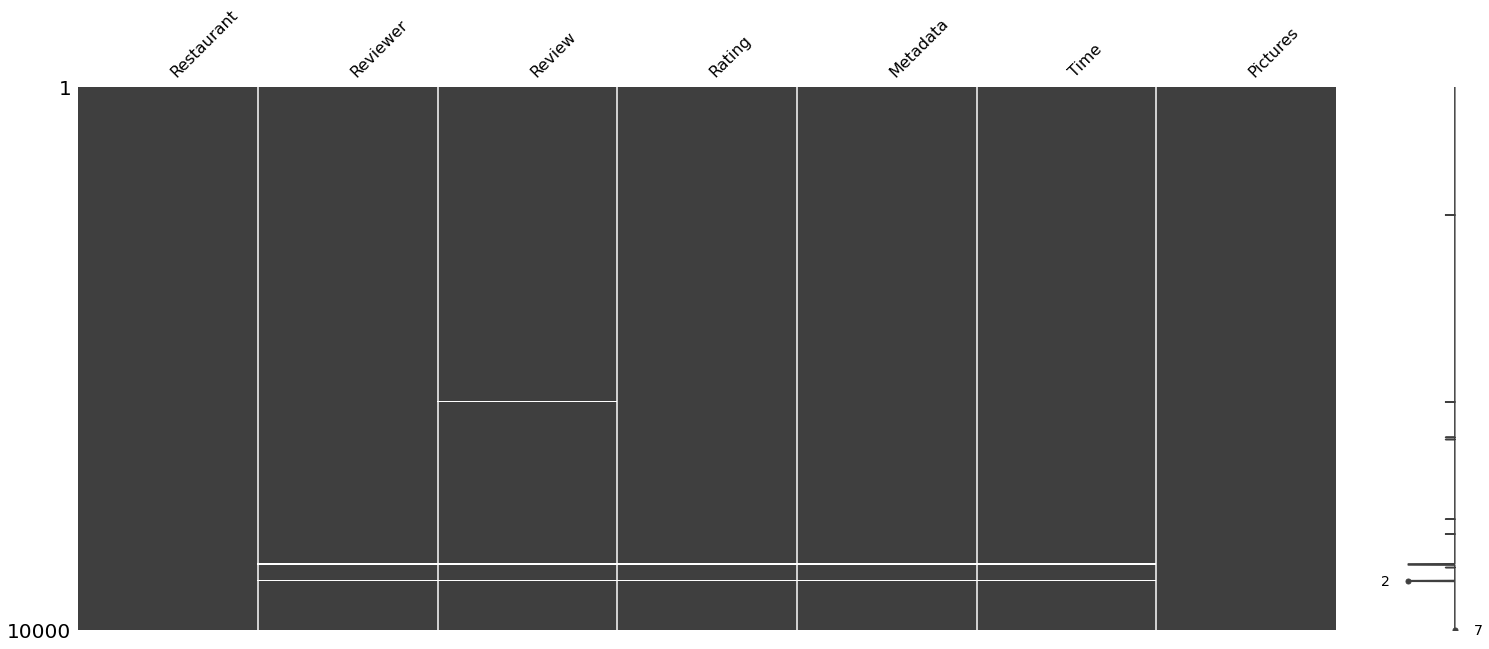

In [ ]:
# visualize the null values in the DataFrame 2
msno.matrix(reviews_df)
plt.show()

### What did you know about your dataset?

We have two datasets in our project - "Zomato Restaurant names and Metadata.csv" and "Zomato Restaurant reviews.csv".

The "Zomato Restaurant names and Metadata.csv" dataset contains six columns: "Name", "Links", "Cost", "Collections", "Cuisines", and "Timings". There are 105 non-null values in each column except for "Collections" and "Timings", which have 51 and 104 non-null values, respectively.

The "Zomato Restaurant reviews.csv" dataset contains seven columns: "Restaurant", "Reviewer", "Review", "Rating", "Metadata", "Time", and "Pictures". There are 10,000 non-null values in the "Restaurant" and "Pictures" columns, while the "Reviewer", "Review", "Rating", "Metadata", and "Time" columns have 9962 non-null values.

Overall, these datasets contain valuable information about restaurants such as their names, cuisines, cost, and customer reviews. The information can be used to perform various analysis tasks such as sentiment analysis and clustering to gain insights into customer preferences and improve restaurant services.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
restaurant_df.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [ ]:
reviews_df.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

In [ ]:
# Dataset Describe
restaurant_df.describe()

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavours-gachibowli,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


In [ ]:
reviews_df.describe()

,Pictures
count,10000.000000
mean,0.748600
std,2.570381
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,64.000000


### Variables Description 

**Variable Description**



---


**Restaurant Data**

---




|**Fields** | **Description**|
|-----------|--------------|
Name | Name of Restaurants
Links | URL Links of Restaurants
Cost | Per person estimated cost of dining
Collections |Tagging of Restaurants with respect to Zomato categories
Cuisines|Cuisines served by restaurants
Timings|Restaurant timings



---


**Review Data**


---


|**Fields** | **Description**|
|-----------|--------------|
Reviewer|Name of the reviewer
review|Review text
Rating|Rating provided
MetaData|Reviewer metadats-No of reviews and followers
Time|Date and Time of Review
Pictures| Number of pictures posted with review


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
restaurant_df.nunique()

Name           105
Links          105
Cost            29
Collections     42
Cuisines        92
Timings         77
dtype: int64

In [ ]:
reviews_df.nunique()

Restaurant     100
Reviewer      7446
Review        9364
Rating          10
Metadata      2477
Time          9782
Pictures        36
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

#### Data Wrangling on Zomato Restaurant Names and Metadata

In [ ]:
# Write your code to make your dataset analysis ready.
def convert_column_to_int64(df, column_name):
    """
    Convert a column in a pandas DataFrame from object to int64 data type,
    while handling values with commas as thousands separators.

    Parameters:
    df (pandas.DataFrame): The DataFrame containing the column to be converted.
    column_name (str): The name of the column to be converted.

    Returns:
    None
    """

    # Remove commas from the column values
    df[column_name] = df[column_name].str.replace(',', '')

    # Convert the column to int64 data type
    df[column_name] = df[column_name].astype('int64')

In [ ]:
# Applying Above Function in 'Cost' col of Restaurant dataset
convert_column_to_int64(restaurant_df, 'Cost')

In [ ]:
restaurant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    int64 
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: int64(1), object(5)
memory usage: 5.0+ KB


In [ ]:
# Define a function to count the number of words in a string separated by commas
def count_words(string):
    words = string.split(',')
    return len(words)

In [ ]:
# Apply the 'count_words' function to the 'Cuisines' column of the DataFrame and store the result in a new 'cuisine_count' column
restaurant_df['cuisine_count'] = restaurant_df['Cuisines'].apply(count_words)

In [ ]:
restaurant_df['cuisine_count'].value_counts()

3    33
2    26
4    21
5    12
1    12
6     1
Name: cuisine_count, dtype: int64

* 33 restaurants with 3 different cusine
* 26 restaurants with 2 different cusine
* 21 restaurants with 4 different cusine
* 12 restaurants with 5 different cusine
* 12 restaurants with only 1 cusine
* only 1 restaurant with 6 different cusine

In [ ]:
# Extract the unique values of 'Cuisines' column by splitting the strings using the comma separator
cuisines = set()
for cuisine_string in restaurant_df['Cuisines']:
    cuisine_list = cuisine_string.split(', ')
    cuisines.update(cuisine_list)
cuisines

{'American',
 'Andhra',
 'Arabian',
 'Asian',
 'BBQ',
 'Bakery',
 'Beverages',
 'Biryani',
 'Burger',
 'Cafe',
 'Chinese',
 'Continental',
 'Desserts',
 'European',
 'Fast Food',
 'Finger Food',
 'Goan',
 'Healthy Food',
 'Hyderabadi',
 'Ice Cream',
 'Indonesian',
 'Italian',
 'Japanese',
 'Juices',
 'Kebab',
 'Lebanese',
 'Malaysian',
 'Mediterranean',
 'Mexican',
 'Mithai',
 'Modern Indian',
 'Momos',
 'Mughlai',
 'North Eastern',
 'North Indian',
 'Pizza',
 'Salad',
 'Seafood',
 'South Indian',
 'Spanish',
 'Street Food',
 'Sushi',
 'Thai',
 'Wraps'}

In [ ]:
len(cuisines)

44

There are 44 different Cuisines present in our dataset.

In [ ]:
# Finding no of restaurnts by latest cuisines
cuisine_list = restaurant_df['Cuisines'].str.split(', ')

# storing all the cusines in cuisine_dict 
cuisine_dict = {}

for cuisine_names in cuisine_list:
    for cuisine in cuisine_names:
        if cuisine in cuisine_dict:
            cuisine_dict[cuisine] += 1
        else:  
            cuisine_dict[cuisine] = 1 

In [ ]:
# convert it to dataframe and getting all Cuisine by transposing the rows in dictionary to columns
cuisine_df = pd.DataFrame.from_dict([cuisine_dict]).transpose().reset_index().rename(columns={'index':'Cuisine', 0:'Number of Restaurants'}).sort_values('Number of Restaurants', ascending=False)
cuisine_df

,Cuisine,Number of Restaurants
5,North Indian,61
0,Chinese,43
1,Continental,21
6,Biryani,16
18,Fast Food,15
7,Asian,15
20,Italian,14
9,Desserts,13
4,South Indian,9
29,Bakery,7


From the above dataframe, we can see that North Indian is the mostly available food on 61 number of different restaurants followed by Chinese and Continental food which is available on 43 and 21 restaurants. It means mostly people demands for this food as compared to other food like pizza, juices, malaysian food which is available on less number of restaurant.

In [ ]:
# Restaurant with maximum number of cuisine
pd.set_option('display.max_colwidth', None)

topRestarant = restaurant_df.loc[restaurant_df.groupby('Name')['cuisine_count'].idxmax()]
topRestarant_sorted = topRestarant.sort_values(by=['cuisine_count'], ascending=False)[:20]
topRestarant_sorted[['Name','cuisine_count','Cuisines']]

,Name,cuisine_count,Cuisines
0,Beyond Flavours,6,"Chinese, Continental, Kebab, European, South Indian, North Indian"
3,Shah Ghouse Hotel & Restaurant,5,"Biryani, North Indian, Chinese, Seafood, Beverages"
70,Urban Asia - Kitchen & Bar,5,"Asian, Thai, Chinese, Sushi, Momos"
21,Jonathan's Kitchen - Holiday Inn Express & Suites,5,"North Indian, Japanese, Italian, Salad, Sushi"
92,Collage - Hyatt Hyderabad Gachibowli,5,"Continental, Italian, North Indian, Chinese, Asian"
82,Al Saba Restaurant,5,"North Indian, Chinese, Seafood, Biryani, Hyderabadi"
8,Hyper Local,5,"American, Chinese, North Indian, Kebab, South Indian"
26,Mustang Terrace Lounge,5,"Mexican, Italian, North Indian, Chinese, Salad"
31,Pista House,5,"Bakery, North Indian, Mughlai, Juices, Chinese"
4,Over The Moon Brew Company,5,"Asian, Continental, North Indian, Chinese, Mediterranean"


* Beyond Flavours restaurant has a maximum number of different type of cuisine followed by Shah Ghouse Hotel & Restaurant.
* Republic Of Noodles - Lemon Tree Hotel has 4 types of cuisine available.

In [ ]:
# Number of Indian Restaurants with Indian cuisine
indian_restaurant = restaurant_df[restaurant_df['Cuisines'].str.contains('Indian')]
indian_restaurant.shape[0]

63

In [ ]:
# Number of Chinese Restaurants with Chinese cuisine
Chinese_restaurant = restaurant_df[restaurant_df['Cuisines'].str.contains('Chinese')]
Chinese_restaurant.shape[0]

43

* There are 63 Restaurants where Indian cuisine is available
* There are 43 Restaurants where Chinese cuisine is available


In [ ]:
pd.set_option('display.max_rows', None)

# Group the DataFrame by Cuisine and sum the total cost for each group
total_cost_by_cuisine = restaurant_df.groupby('Cuisines')['Cost'].sum()
total_cost_by_cuisine.sort_values(ascending=False)

Cuisines
North Indian, Chinese, Continental                                   3300
Continental, Italian, North Indian, Chinese, Asian                   2800
Continental                                                          2600
Modern Indian, Asian, Continental, Italian                           2500
North Indian, Chinese                                                2050
North Indian, Japanese, Italian, Salad, Sushi                        1900
North Indian, Italian, Continental, Asian                            1800
Asian, Sushi                                                         1750
Thai, Asian, Chinese, Malaysian                                      1700
Italian, North Indian, South Indian, Asian                           1700
Mediterranean, North Indian, Kebab, BBQ                              1600
American                                                             1600
North Indian, Chinese, Japanese, Sushi                               1500
European, Mediterranean, Nort

In [ ]:
# Top 20 most expensive restaurants where average per person estimated cost of dining is high
top_20_expensive_restaurants = restaurant_df.sort_values('Cost', ascending=False).head(20)
top_20_expensive_restaurants[['Name','Cost']]

,Name,Cost
92,Collage - Hyatt Hyderabad Gachibowli,2800
56,Feast - Sheraton Hyderabad Hotel,2500
21,Jonathan's Kitchen - Holiday Inn Express & Suites,1900
18,10 Downing Street,1900
91,Cascade - Radisson Hyderabad Hitec City,1800
97,Zega - Sheraton Hyderabad Hotel,1750
104,Republic Of Noodles - Lemon Tree Hotel,1700
34,Mazzo - Marriott Executive Apartments,1700
90,Arena Eleven,1600
11,Barbeque Nation,1600


Collage - Hyatt Hyderabad Gachibowli and Feast - Sheraton Hyderabad Hotel are the two most expensive restaurants with the cost of 2800 and 2500 ruppees which is a average per person estimated cost of dining.

In [ ]:
# Top 20 most affordable restaurants where average per person estimated cost of dining is low
top_20_affordable_restaurants = restaurant_df.sort_values('Cost').head(20)
top_20_affordable_restaurants[['Name','Cost']]

,Name,Cost
89,Mohammedia Shawarma,150
23,Amul,150
54,Asian Meal Box,200
101,Sweet Basket,200
59,KS Bakers,200
85,Momos Delight,200
29,Hunger Maggi Point,200
103,Wich Please,250
7,Shah Ghouse Spl Shawarma,300
58,Tempteys,350


Mohammedia Shawarma, Amul and Asian Meal Box Hotel are the most affordable Restaurants where the cost of 150 and 200 ruppees which is a average per person estimated cost of dining.

#### Data Wrangling on Zomato Restaurant Reviews Dataset

In [ ]:
# convert the 'Time' column from object to datetime data type
reviews_df['Time'] = pd.to_datetime(reviews_df['Time'], format='%m/%d/%Y %H:%M')
reviews_df['Time'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Time
Non-Null Count  Dtype         
--------------  -----         
9962 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 78.2 KB


In [ ]:
# Total count of ratings from 1 star to 5 star
ratings_df = reviews_df['Rating'].value_counts().reset_index()
ratings_df.rename(columns={'index': 'Ratings(1-5)'}, inplace=True)
ratings_df.rename(columns={'Rating': 'Count'}, inplace=True)
ratings_df

,Ratings(1-5),Count
0,5,3832
1,4,2373
2,1,1735
3,3,1193
4,2,684
5,4.5,69
6,3.5,47
7,2.5,19
8,1.5,9
9,Like,1


In [ ]:
# drop the rows where 'Rating' is not equal to 'Like'
reviews_df = reviews_df[reviews_df['Rating'] != 'Like']

In [ ]:
reviews_df['Rating'] = reviews_df['Rating'].astype('float')

* 5 star is the ratings given by 3832 number of customer.
* Lowest rating given by the customers is 1.5 star.

In [ ]:
# rename the 'Reviewer' column to 'Customer_Name'
reviews_df = reviews_df.rename(columns={'Reviewer': 'Customer_Name'})

In [ ]:
reviews_df.head()

,Restaurant,Customer_Name,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . had Saturday lunch , which was cost effective .\nGood place for a sate brunch. One can also chill with friends and or parents.\nWaiter Soumen Das was really courteous and helpful.",5.0,"1 Review , 2 Followers",2019-05-25 15:54:00,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. Service is very prompt. Food is good. Over all a good experience. Soumen Das - kudos to the service,5.0,"3 Reviews , 2 Followers",2019-05-25 14:20:00,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx for the service by Pradeep and Subroto. My personal recommendation is Penne Alfredo Pasta:) ....... Also the music in the background is amazing.,5.0,"2 Reviews , 3 Followers",2019-05-24 22:54:00,0
3,Beyond Flavours,Swapnil Sarkar,"Soumen das and Arun was a great guy. Only because of their behavior and sincerety, And good food off course, I would like to visit this place again.",5.0,"1 Review , 1 Follower",2019-05-24 22:11:00,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and basket mutton biryani. All are good. Thanks to Pradeep. He served well. We enjoyed here. Ambience is also very good.,5.0,"3 Reviews , 2 Followers",2019-05-24 21:37:00,0


In [ ]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Restaurant     9999 non-null   object        
 1   Customer_Name  9961 non-null   object        
 2   Review         9954 non-null   object        
 3   Rating         9961 non-null   float64       
 4   Metadata       9961 non-null   object        
 5   Time           9961 non-null   datetime64[ns]
 6   Pictures       9999 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 624.9+ KB


In [ ]:
# Total number of customers
reviewers = reviews_df['Customer_Name'].value_counts().reset_index()
reviewers.rename(columns={'index': 'Customer Name'}, inplace=True)
reviewers.rename(columns={'Customer_Name': 'Count'}, inplace=True)
reviewers[:20]

,Customer Name,Count
0,Ankita,13
1,Parijat Ray,13
2,Kiran,12
3,Jay Mehta,11
4,Vedant Killa,11
5,Sravani,10
6,Siva Kumar,10
7,Priyanka,10
8,Age Of Foodies (Suraj Karambe),10
9,Manojkumar D Nambisan,10


In [ ]:
# extract Review_count and Followers from Metadata
reviews_df['Review_count'] = reviews_df['Metadata'].str.extract('(\d+) Review')
reviews_df['Followers'] = reviews_df['Metadata'].str.extract('(\d+) Follower')

In [ ]:
# fill missing values with 0 in 'Review_count' column and 'Followers' column
reviews_df['Review_count'] = pd.to_numeric(reviews_df['Review_count']).fillna(0).astype(int)
reviews_df['Followers'] = pd.to_numeric(reviews_df['Followers']).fillna(0).astype(int)

In [ ]:
# Dropping unnecessary column as it is not needed now
reviews_df = reviews_df.drop(columns=['Metadata'])
reviews_df.isnull().sum()

Restaurant        0
Customer_Name    38
Review           45
Rating           38
Time             38
Pictures          0
Review_count      0
Followers         0
dtype: int64

In [ ]:
# Top 20 Popular customers (With Highest number of followers) and their order timings
popular_customers = reviews_df.loc[reviews_df.groupby('Customer_Name')['Followers'].idxmax()]
popular_customers_sorted = popular_customers.sort_values(by=['Followers'], ascending=False)[:20]
popular_customers_sorted[['Customer_Name','Followers', 'Restaurant','Time']]

,Customer_Name,Followers,Restaurant,Time
3927,Satwinder Singh,13410,Deli 9 Bistro,2019-02-10 12:46:00
8719,Eat_vth_me,13320,American Wild Wings,2019-05-13 15:32:00
3147,Samar Sardar,11329,Pista House,2018-10-12 20:21:00
7884,Foodies Hyderabad,9494,Khaan Saab,2019-02-01 18:04:00
1177,Srinivas,7628,Barbeque Nation,2018-07-14 13:10:00
1071,Aman Arora,7589,Sardarji's Chaats & More,2018-10-31 22:33:00
635,ASH&B2,6931,eat.fit,2019-04-07 22:27:00
5581,Hasanthi Mula,5879,Cafe Eclat,2018-06-10 14:05:00
9701,#FOODPORN,5873,Zega - Sheraton Hyderabad Hotel,2019-05-15 16:35:00
4820,FooD HUNTer,5715,Udipi's Upahar,2018-10-01 09:28:00


In [ ]:
# Top 20 Popular customers (With Highest number of Review_count)
popular_customersR = reviews_df.loc[reviews_df.groupby('Customer_Name')['Review_count'].idxmax()]
popular_customersR_sorted = popular_customersR.sort_values(by=['Review_count'], ascending=False)[:20]
popular_customersR_sorted[['Customer_Name','Review_count']]

,Customer_Name,Review_count
3124,Anvesh Chowdary,1031
4512,ᴀɴ.ᴏᴛʜᴇʀ.sᴇɴ,685
7638,Abc098,665
6627,Mithun Ravindranathan,560
9653,Mohd Zubair Ali (Hyderabad.Food.Diaries),482
9999,Bhargava Krishna,472
5889,Epicurean Tales,452
755,Raghu,443
9179,Aarti Kamath,417
9181,Shrishail Deshnur,414


In [ ]:
# Top 20 Popular Restaurant (With Highest number of Review_count)
popular_restaurant = reviews_df.loc[reviews_df.groupby('Restaurant')['Review_count'].idxmax()]
popular_restaurant_sorted = popular_restaurant.sort_values(by=['Review_count'], ascending=False)[:20]
popular_restaurant_sorted[['Restaurant','Review_count']]

,Restaurant,Review_count
9208,Collage - Hyatt Hyderabad Gachibowli,1031
3124,Pista House,1031
7297,Labonel,1031
4512,Owm Nom Nom,685
7638,The Old Madras Baking Company,665
6627,Aromas@11SIX,560
9653,Hyderabadi Daawat,482
9999,Chinese Pavilion,472
5889,Tempteys,452
9168,Cascade - Radisson Hyderabad Hitec City,452


In [ ]:
# Top 20 Popular Restaurant (With Highest number of followers)
popular_restaurant_by_followers = reviews_df.loc[reviews_df.groupby('Restaurant')['Followers'].idxmax()]
popular_restaurant_by_followers_sorted = popular_restaurant_by_followers.sort_values(by=['Followers'], ascending=False)[:20]
popular_restaurant_by_followers_sorted[['Restaurant','Followers']]

,Restaurant,Followers
6592,Komatose - Holiday Inn Express & Suites,13410
3927,Deli 9 Bistro,13410
6876,The Tilt Bar Republic,13410
8719,American Wild Wings,13320
5160,Hitech Bawarchi Food Zone,11329
3147,Pista House,11329
8027,Tandoori Food Works,9494
9659,Hyderabadi Daawat,9494
9518,Desi Bytes,9494
7884,Khaan Saab,9494


In [ ]:
# Peak hours for orders
def get_number_of_orders(a,b):
  A = (reviews_df['Time'].dt.hour >= a) & (reviews_df['Time'].dt.hour < b)
  peak_A = reviews_df[A]
  row_count = peak_A.shape[0]
  print(f'Number of Orders on Zomato between {a} and {b} is :{row_count}')

In [ ]:
atime=list(np.arange(25))
btime=list(np.arange(1,25))
for a,b in zip(atime,btime):
  d = get_number_of_orders(a,b)

Number of Orders on Zomato between 0 and 1 is :509
Number of Orders on Zomato between 1 and 2 is :313
Number of Orders on Zomato between 2 and 3 is :167
Number of Orders on Zomato between 3 and 4 is :102
Number of Orders on Zomato between 4 and 5 is :55
Number of Orders on Zomato between 5 and 6 is :39
Number of Orders on Zomato between 6 and 7 is :44
Number of Orders on Zomato between 7 and 8 is :78
Number of Orders on Zomato between 8 and 9 is :134
Number of Orders on Zomato between 9 and 10 is :171
Number of Orders on Zomato between 10 and 11 is :229
Number of Orders on Zomato between 11 and 12 is :308
Number of Orders on Zomato between 12 and 13 is :459
Number of Orders on Zomato between 13 and 14 is :580
Number of Orders on Zomato between 14 and 15 is :776
Number of Orders on Zomato between 15 and 16 is :645
Number of Orders on Zomato between 16 and 17 is :549
Number of Orders on Zomato between 17 and 18 is :480
Number of Orders on Zomato between 18 and 19 is :438
Number of Orders

In [ ]:
# Lets find Peak hours which is between 8 pm to 12 am
get_number_of_orders(20,24)

Number of Orders on Zomato between 20 and 24 is :3363


In [ ]:
# Lets find Off hours which is between 4 am to 8 am
get_number_of_orders(4,8)

Number of Orders on Zomato between 4 and 8 is :216


In [ ]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Restaurant     9999 non-null   object        
 1   Customer_Name  9961 non-null   object        
 2   Review         9954 non-null   object        
 3   Rating         9961 non-null   float64       
 4   Time           9961 non-null   datetime64[ns]
 5   Pictures       9999 non-null   int64         
 6   Review_count   9999 non-null   int64         
 7   Followers      9999 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 961.1+ KB


In [ ]:
hourly_counts = reviews_df['Time'].dt.hour.value_counts()
# find the busiest Hour
busiest_hour = hourly_counts.idxmax()
print(f'busiest_hour: {busiest_hour}')
print("The number of Orders in that hour is:", hourly_counts[busiest_hour])

busiest_hour: 22.0
The number of Orders in that hour is: 968


In [ ]:
# extract the date from the datetime column
reviews_df['date'] = reviews_df['Time'].dt.date

# count the number of orders for each date
daily_counts = reviews_df['date'].value_counts()

# find the busiest day
busiest_day = daily_counts.idxmax()

# print the results
print("The busiest day for Zomato is:", busiest_day)
print("The number of Orders on that day is:", daily_counts[busiest_day])


The busiest day for Zomato is: 2018-07-29
The number of Orders on that day is: 97


* The Busiest day for Zomato is **29th July 2018**
* The number of Orders on that day is **97**

#### Merging restaurant_df and reviews_df together

In [ ]:
# merging both the data together
restaurant = restaurant_df.rename(columns = {'Name':'Restaurant'})
zomato_data = restaurant.merge(reviews_df, on = 'Restaurant')
zomato_data.shape

(9999, 15)

In [ ]:
zomato_data.rename({'Restaurant':'Restaurant_name', 'Timings':'Restaurant_timings', 'Time':'Review_timing'},axis=1, inplace=True )
zomato_data.head(3)

,Restaurant_name,Links,Cost,Collections,Cuisines,Restaurant_timings,cuisine_count,Customer_Name,Review,Rating,Review_timing,Pictures,Review_count,Followers,date
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavours-gachibowli,800,"Food Hygiene Rated Restaurants in Hyderabad, Corporate Favorites, Great Buffets, Top-Rated, Gold Curated, Live Sports Screenings","Chinese, Continental, Kebab, European, South Indian, North Indian","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",6,Rusha Chakraborty,"The ambience was good, food was quite good . had Saturday lunch , which was cost effective .\nGood place for a sate brunch. One can also chill with friends and or parents.\nWaiter Soumen Das was really courteous and helpful.",5.0,2019-05-25 15:54:00,0,1,2,2019-05-25
1,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavours-gachibowli,800,"Food Hygiene Rated Restaurants in Hyderabad, Corporate Favorites, Great Buffets, Top-Rated, Gold Curated, Live Sports Screenings","Chinese, Continental, Kebab, European, South Indian, North Indian","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",6,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. Service is very prompt. Food is good. Over all a good experience. Soumen Das - kudos to the service,5.0,2019-05-25 14:20:00,0,3,2,2019-05-25
2,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavours-gachibowli,800,"Food Hygiene Rated Restaurants in Hyderabad, Corporate Favorites, Great Buffets, Top-Rated, Gold Curated, Live Sports Screenings","Chinese, Continental, Kebab, European, South Indian, North Indian","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",6,Ashok Shekhawat,A must try.. great food great ambience. Thnx for the service by Pradeep and Subroto. My personal recommendation is Penne Alfredo Pasta:) ....... Also the music in the background is amazing.,5.0,2019-05-24 22:54:00,0,2,3,2019-05-24


### What all manipulations have you done and insights you found?

* There are 105 different restaurant data in restaurant CSV
* 10000 Data points in reviews csv

* 5 Rating by 3832 Number of People
* 4 Rating by 2373 Number of People
* 1 Rating by 1735 Number of People
* 3 Rating by 1193 Number of People
* 2 Rating by 684  Number of People

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Dist Plot and Hist Plot on Numerical Features (Univariate Analysis)

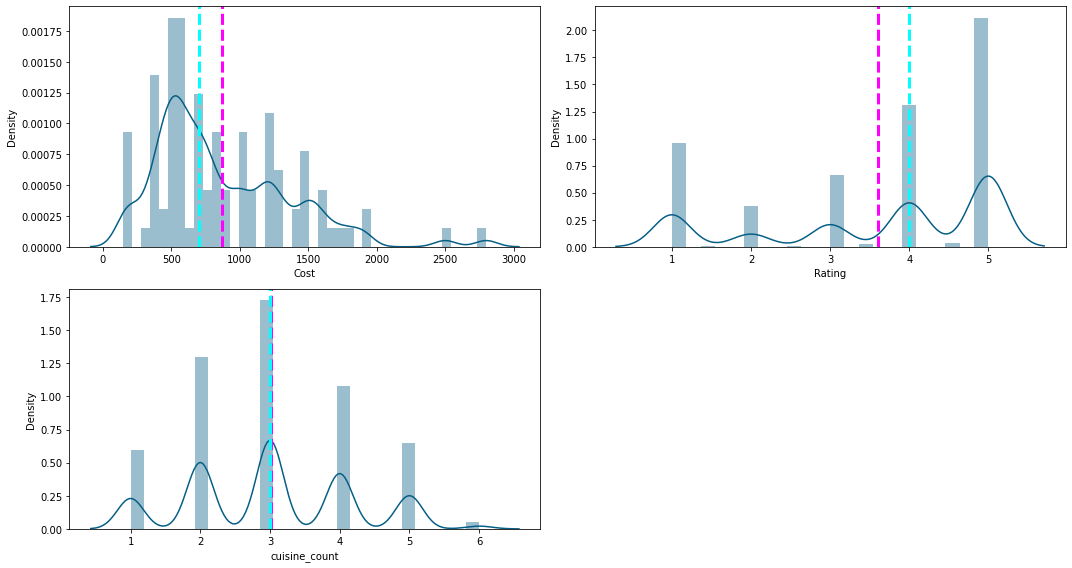

In [ ]:
# Chart - 1 visualization code
# GRAPH -1
# Dist Plot of some important numerical feature 
# To see the distributions and skewness of the numerical feature
plt.figure(figsize = (15,8))
for i,col in enumerate(['Cost','Rating','cuisine_count']):
    plt.subplot(2,2,i+1)
    sns.distplot(zomato_data[col], color = '#055E85')
    feature = zomato_data[col]
    plt.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=3)
    plt.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=3)
    plt.tight_layout()
plt.show()


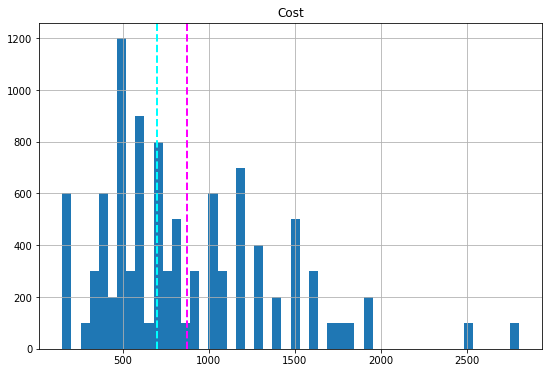

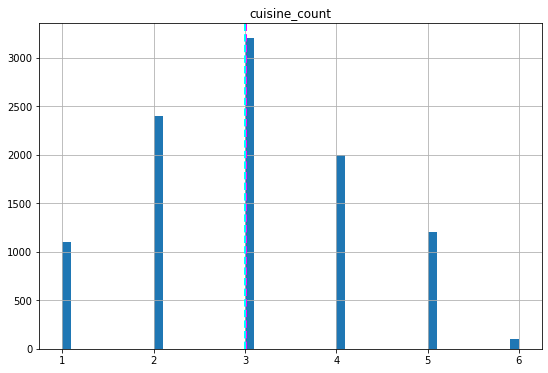

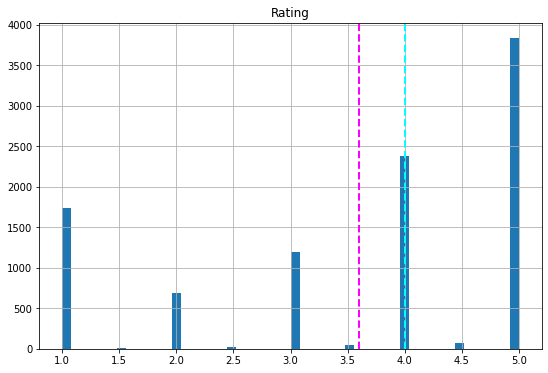

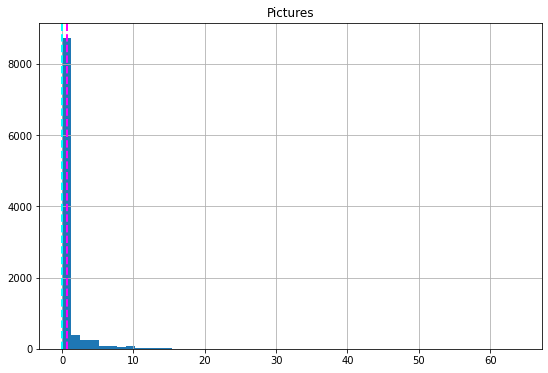

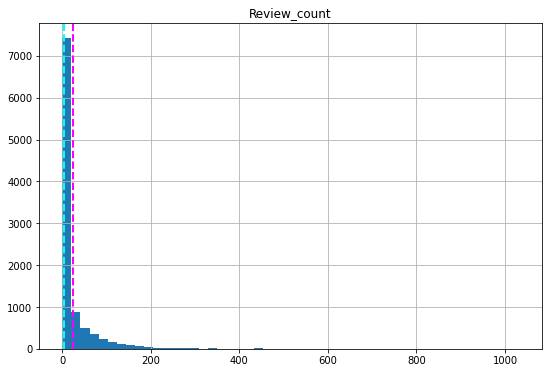

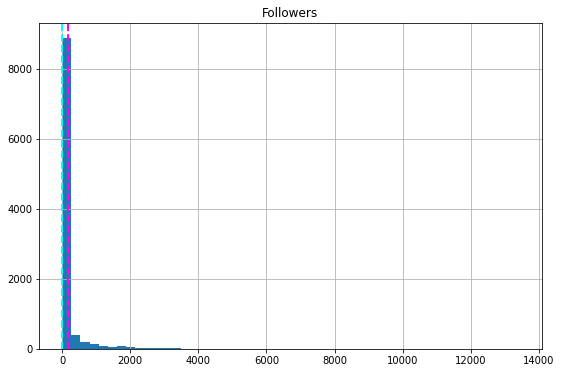

In [ ]:
# GRAPH - 2
# Hist Plot of some important numerical feature 
# To see the distributions and skewness of the numerical feature
numeric_features = zomato_data[['Cost','cuisine_count','Rating','Pictures','Review_count','Followers']].describe().columns
numeric_features
# To see the distributions and skewness of the numerical feature
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = zomato_data[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

##### 1. Why did you pick the specific chart?

**Dist Plot** is known as distribution plot which depicts the variations in data that is it will show the variations in distribution of observations. It also displays a combination of statistical representations of numerical data, such as histogram, kde, bars etc. Distplot is helpful in understanding the distribution of the feature.

**Hist Plot** is a graphical representation of data that organizes the data into bins, and shows how frequently each bin occurs. It is used to illustrate the distribution of data, as well as its skewness.



##### 2. What is/are the insight(s) found from the chart?

Insights:
* Cost column shows skewness.
* Maximum restaurant has a price range of 500 rupee.
* Most of the restaurants got 5 star ratings.
* Most of the restaurants has 3 types of cuisines.
* Most of customers posts 1 or 2 pictures with their reviews.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Cost is the important factor for any business. But from this visualisation, we are not getting any insights. we will do further analysis.

#### Chart - 2 Pie Plot on Ratings Features (Univariate Analysis)

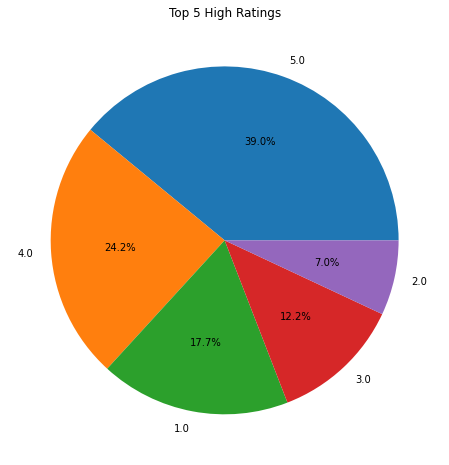

In [ ]:
# Chart - 2 visualization code
# Pie Plot of Total count of ratings from 1 star to 5 star

# ratings_df = reviews_df['Rating'].value_counts().reset_index()
# ratings_df.rename(columns={'index': 'Ratings(1-5)'}, inplace=True)
# ratings_df.rename(columns={'Rating': 'Count'}, inplace=True)
# ratings_df

plt.figure(figsize=(15,8))
x_label = reviews_df['Rating'].value_counts().index
y_label = reviews_df['Rating'].value_counts().values
plt.pie(x = y_label[:5], labels = x_label[:5], autopct='%1.1f%%')
plt.title('Top 5 High Ratings', color= 'black')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3 Bar Plot on Numerical + Categorical Features (Bivariate)

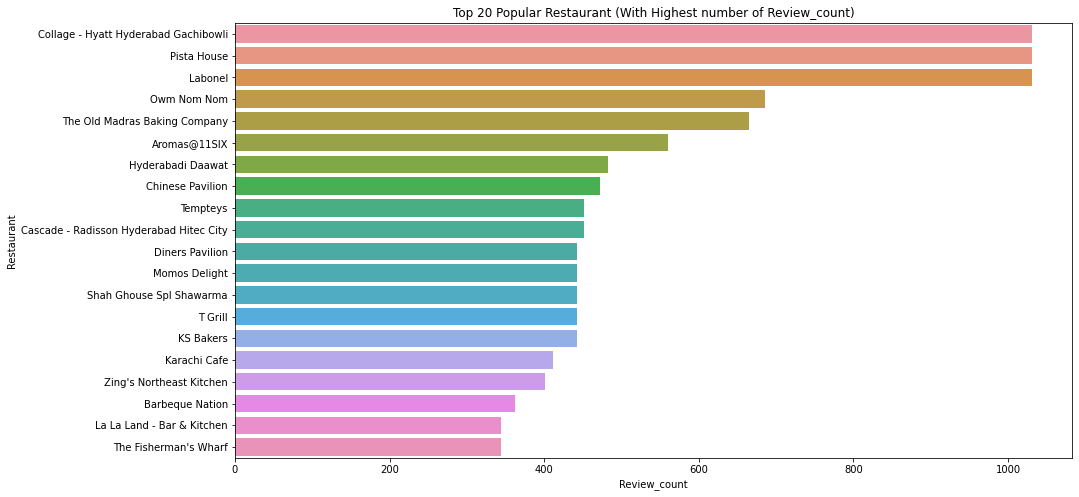

In [ ]:
# Chart - 3 visualization code
# GRAPH - 1
# Bar plot on popular restaurant(With Highest number of Review_count)
plt.figure(figsize=(15,8))
sns.barplot(data = popular_restaurant_sorted, x = 'Review_count', y = 'Restaurant')
plt.title('Top 20 Popular Restaurant (With Highest number of Review_count)')
plt.show()

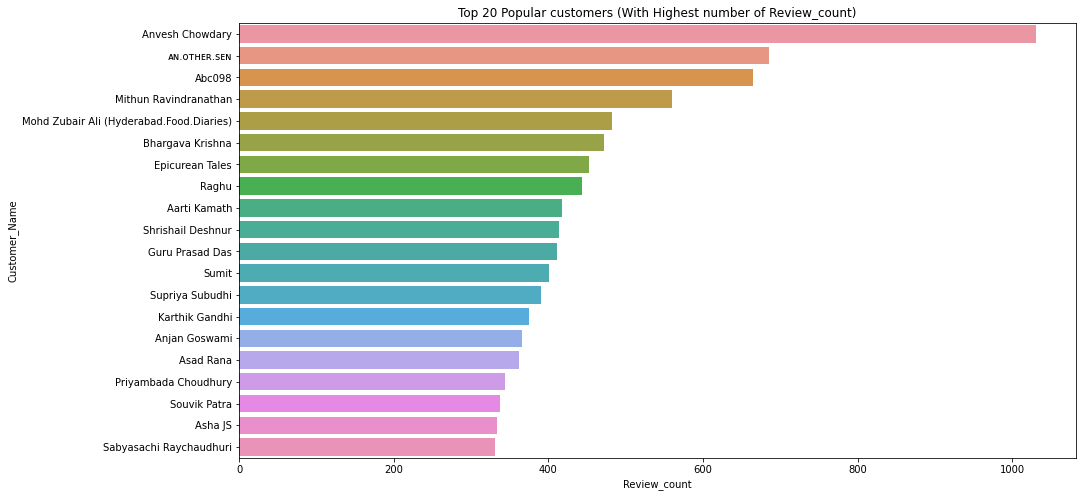

In [ ]:
# GRAPH - 2
# Bar Plot on Popular customers With Highest number of Review_count
plt.figure(figsize=(15,8))
sns.barplot(data = popular_customersR_sorted, x = 'Review_count', y = 'Customer_Name')
plt.title('Top 20 Popular customers (With Highest number of Review_count)')
plt.show()

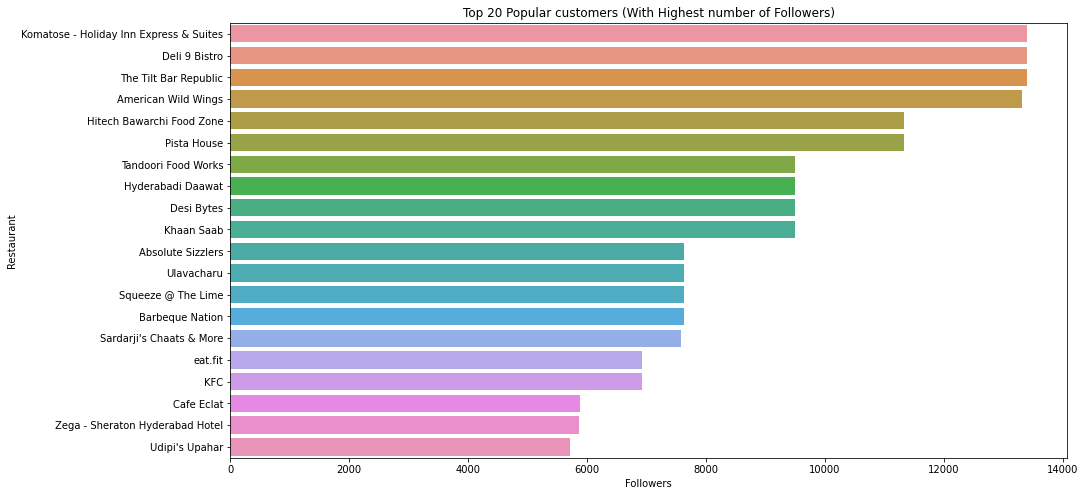

In [ ]:
# GRAPH - 3
# Bar Plot on Popular Restaurant With Highest number of followers
plt.figure(figsize=(15,8))
sns.barplot(data = popular_restaurant_by_followers_sorted, x = 'Followers', y = 'Restaurant')
plt.title('Top 20 Popular customers (With Highest number of Followers)')
plt.show()

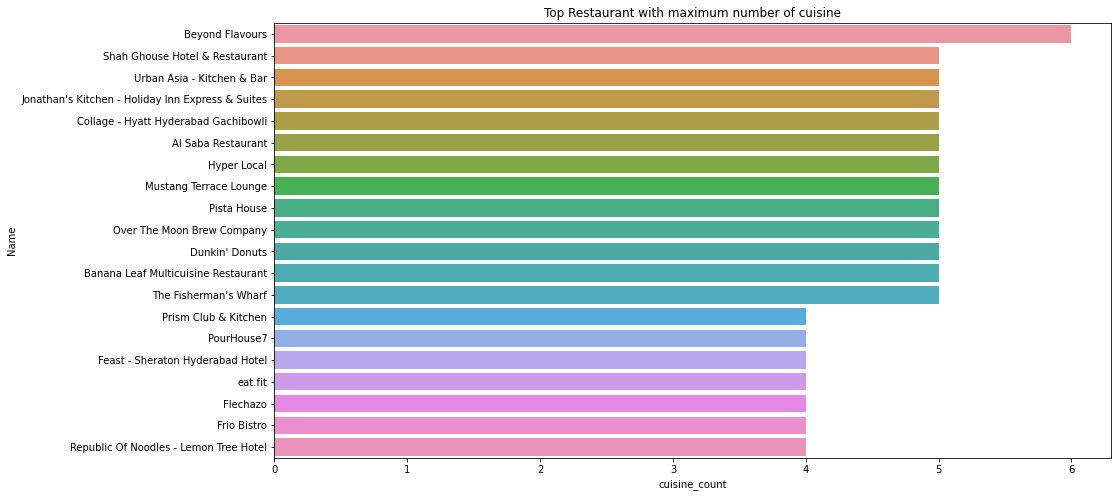

In [ ]:
# GRAPH - 4
# Bar Plot on Restaurant with maximum number of cuisine
plt.figure(figsize=(15,8))
sns.barplot(data = topRestarant_sorted, x = 'cuisine_count', y = 'Name')
plt.title('Top Restaurant with maximum number of cuisine')
plt.show()

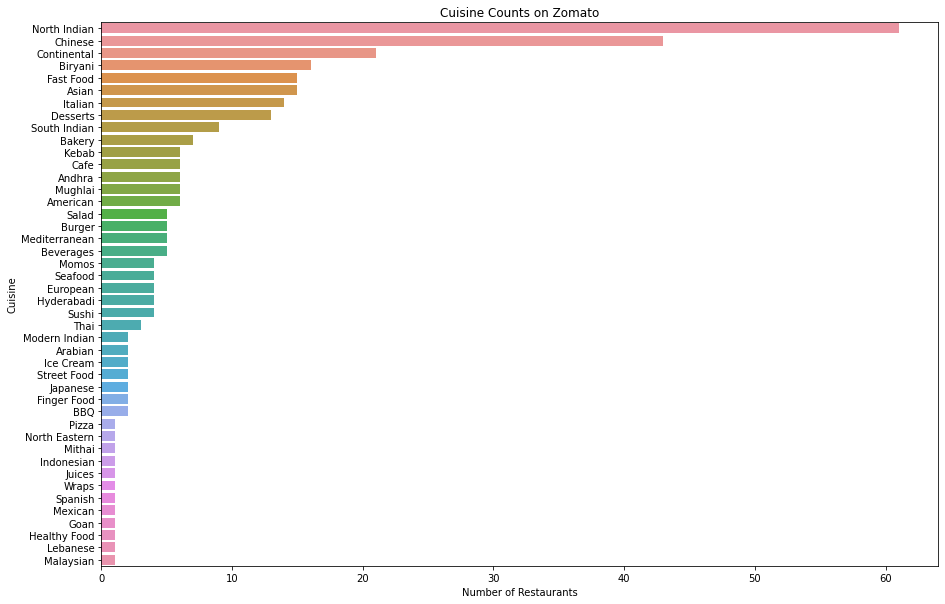

In [ ]:
# GRAPH - 5
# Bar Plot on Total cuisine count
plt.figure(figsize=(15,10))
sns.barplot(x='Number of Restaurants', y='Cuisine', data=cuisine_df)
plt.title('Cuisine Counts on Zomato')
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts indicates the frequency counts of values for the different levels of a categorical variable. Sometimes, bar charts exhibit different statistics, such as percentages.

##### 2. What is/are the insight(s) found from the chart?

* Collage - Hyatt Hyderabad Gachibowli, Pista House	and Labonel is the most reviewed restaurants having 1031 reviews. While La La Land - Bar & Kitchen and The Fisherman's Wharf has the lowest reviews.
* 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# Chart - 3 visualization code
# Removing stop words and also most common words used by restaurants

stop_words = stopwords.words('english')
print(stop_words)

# common word used in restaurants
common_word = ['place', 'good','one','food','ordered','taste','well','order','restaurant','also']
common_word


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

['place',
 'good',
 'one',
 'food',
 'ordered',
 'taste',
 'well',
 'order',
 'restaurant',
 'also']

In [ ]:
import re
reviews_df['Review'] = reviews_df['Review'].map(lambda x: re.sub('[,\.!?]',     #Search for all non-letters   
                                                                '',             # Replace all non-letters with spaces
                                                                str(x)))        # Column and row to search
reviews_df['Review'] = reviews_df['Review'].map(lambda x: x.lower())
reviews_df['Review'] = reviews_df['Review'].map(lambda x: x.split())
reviews_df['Review'] = reviews_df['Review'].apply(lambda x: [item for item in x if item not in stop_words])
reviews_df['Review'] = reviews_df['Review'].apply(lambda x: [item for item in x if item not in common_word])

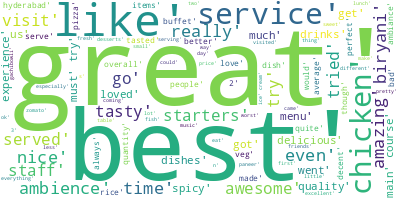

In [ ]:
# Wordcloud for review column
reviews_df['Review'] = reviews_df['Review'].astype(str)

ps = PorterStemmer() 
reviews_df['Review']=reviews_df['Review'].map(lambda x: ps.stem(x))
long_string = ','.join(list(reviews_df['Review'].values))
long_string
wordcloud = WordCloud(background_color="white", max_words=100, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [ ]:
# Extracting positive and negetive reviews 
reviews_df['Rating'] = pd.to_numeric(reviews_df['Rating'],errors='coerce')

# Positive review is where ratings is greater than & equal to 3 star
pos_reviews = reviews_df[reviews_df.Rating>= 3]

# Negetive review is where ratings is less than the 3 star
neg_reviews = reviews_df[reviews_df.Rating< 3]

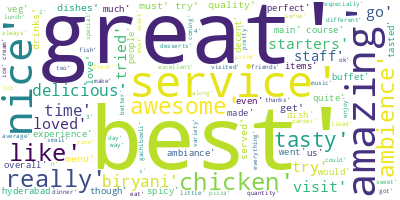

In [ ]:
# Wordcloud for Positive Reviews
long_string = ','.join(list(pos_reviews['Review'].values))
long_string

wordcloud = WordCloud(background_color="white", max_words=100, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

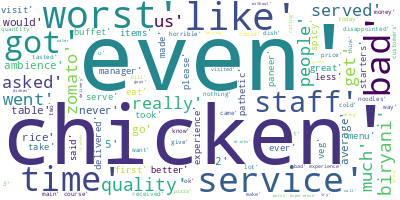

In [ ]:
# Wordcloud for Negetive Reviews
long_string = ','.join(list(neg_reviews['Review'].values))
long_string
wordcloud = WordCloud(background_color="white", max_words=100, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

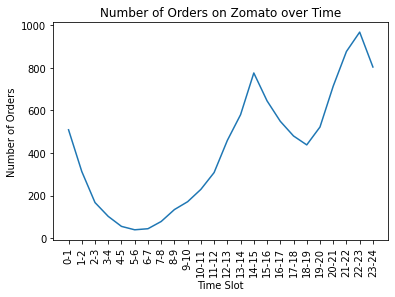

In [ ]:
# Chart - 4 visualization code
# create a dictionary to store the data
data = {'Time Slot': ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17', '17-18', '18-19', '19-20', '20-21', '21-22', '22-23', '23-24'],
        'Number of Orders': [509, 313, 167, 102, 55, 39, 44, 78, 134, 171, 229, 308, 459, 580, 776, 645, 549, 480, 438, 522, 714, 877, 968, 804]}

# create a pandas dataframe from the data
df = pd.DataFrame(data)

# create a line plot using seaborn
sns.lineplot(x='Time Slot', y='Number of Orders', data=df)

# set the title of the plot
plt.title('Number of Orders on Zomato over Time')
plt.xticks(rotation=90)

# show the plot
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

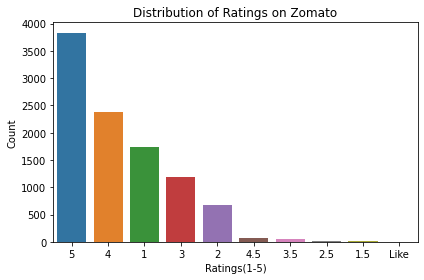

In [ ]:
# Chart - 5 visualization code
# create the barplot using seaborn
sns.barplot(x='Ratings(1-5)', y='Count', data=ratings_df)

# set the title of the plot
plt.title('Distribution of Ratings on Zomato')
plt.tight_layout()
# show the plot
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

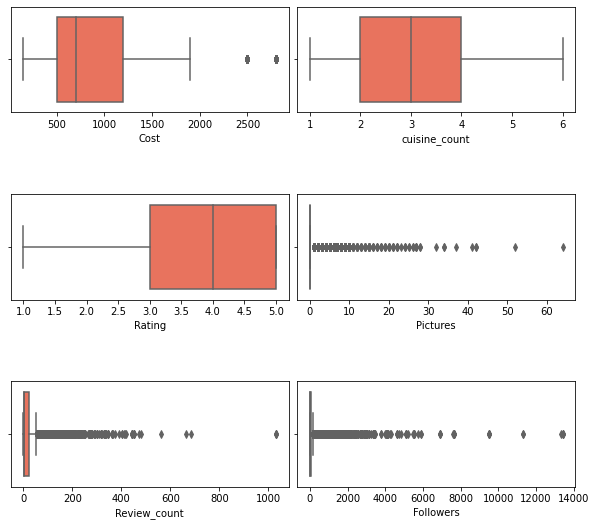

In [ ]:
# Chart - 6 visualization code
# Checking for outliers
plt.figure(figsize=(8,25))
c=1
for i in numeric_features:
    plt.subplot(10, 2, c)
    plt.xlabel('Distibution of {}'.format(i))
    sns.boxplot(x=i,data=zomato_data,color="tomato")
    c = c + 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

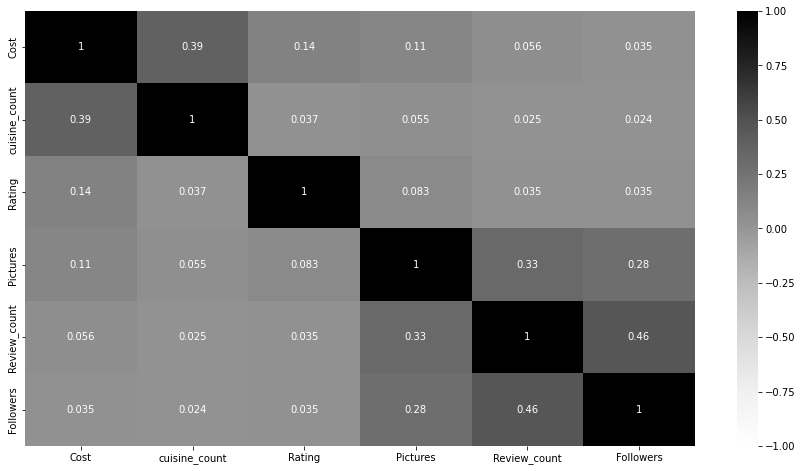

In [ ]:
# Correlation Heatmap visualization code
correlation = zomato_data.corr()
plt.figure(figsize = (15,8))
sns.heatmap(correlation, cmap = 'Greys', annot = True, vmin = -1, vmax=1)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

#### Handling Missing Values in Zomato Restaurant Dataset

In [ ]:
# Handling Missing Values & Missing Value Imputation
restaurant_df.isna().sum()

In [ ]:
# Filling null value in collection column with 'not avaialble' tag.
restaurant_df.fillna('Not Available')
#restaurant_df['Collections'].isna().sum()

In [ ]:
# Dropping null value in 'Timings' column as it will not affect our data
restaurant_df.dropna(inplace=True) 
restaurant_df.isnull().sum()

#### Handling Missing Values in Zomato Reviews Datasets

In [ ]:
# Handling Missing Values & Missing Value Imputation
# Dropping rows with null values in customer name column
reviews_df.dropna(subset=['Customer_Name'], inplace=True)

In [ ]:
# Hotels without reviews
hotel_without_review = [name for name in restaurant_df.Name.unique().tolist() if name not in reviews_df.Restaurant.unique().tolist()]
hotel_without_review

In [ ]:
reviews_df.isnull().sum()

In [ ]:
# Filling review column with 'no review provided' tag
reviews_df['Review'].fillna('No review provided', inplace=True)

In [ ]:
reviews_df.info()

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns


#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations


#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
# Extracting year, month and hour from 'Time' column
reviews_df['Time']=pd.to_datetime(reviews_df['Time'])
reviews_df['Review_Year'] = pd.DatetimeIndex(reviews_df['Time']).year
reviews_df['Review_Month'] = pd.DatetimeIndex(reviews_df['Time']).month
reviews_df['Review_Hour'] = pd.DatetimeIndex(reviews_df['Time']).hour

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***